In [ ]:
import pandas as pd
import imblearn
import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [ ]:
data = pd.read_csv("encode1_off.csv")
data.head()

,Unnamed: 0,Protein Annotation,Day21-ETP,sgRNA_vs_Target,sgRNA_vs_Mutated,Mutated_vs_Target,TID,MatchResult
0,0,76.54,0.758783,19,20,19,0,0
1,1,76.54,0.490986,13,3,10,0,1
2,2,76.54,0.428038,14,3,8,0,1
3,3,76.54,0.345700,19,20,19,0,0
4,4,76.54,0.143454,14,4,10,0,1


In [ ]:
data = data.drop(['Unnamed: 0'], axis=1)
data.head()

,Protein Annotation,Day21-ETP,sgRNA_vs_Target,sgRNA_vs_Mutated,Mutated_vs_Target,TID,MatchResult
0,76.54,0.758783,19,20,19,0,0
1,76.54,0.490986,13,3,10,0,1
2,76.54,0.428038,14,3,8,0,1
3,76.54,0.345700,19,20,19,0,0
4,76.54,0.143454,14,4,10,0,1


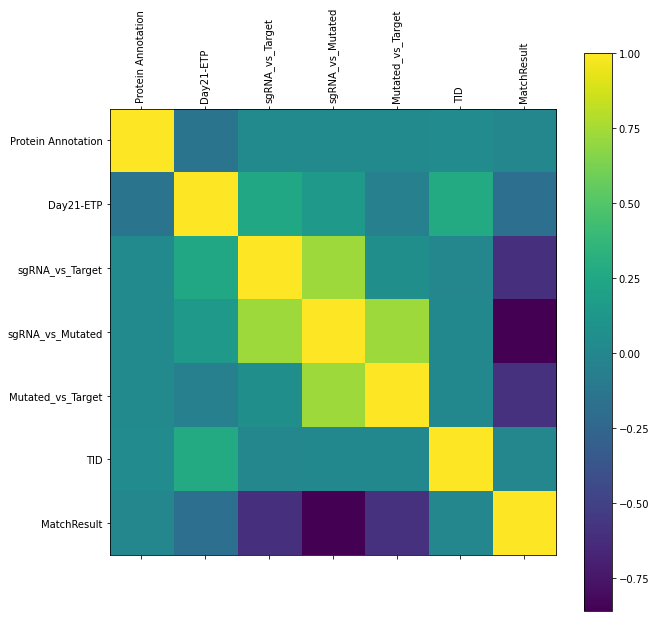

In [ ]:
plt.matshow(data.corr())
plt.xticks(np.arange(7), data.columns, rotation=90)
plt.yticks(np.arange(7), data.columns, rotation=0)
plt.colorbar()
plt.show()

In [ ]:
count = 0
test = pd.DataFrame()
train = pd.DataFrame()
for index, row in data.iterrows():
    count += 1
    if (count%3)==0:
        test = test.append(row)
    else:
        train = train.append(row)

In [ ]:
train1 = train
test1 = test

In [ ]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27043 entries, 0 to 40563
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CB_vs_MT            27043 non-null  float64
 1   CB_vs_WT            27043 non-null  float64
 2   Day21-ETP           27043 non-null  float64
 3   MT_vs_WT            27043 non-null  float64
 4   MatchResult         27043 non-null  float64
 5   Protein Annotation  27043 non-null  float64
 6   TID                 27043 non-null  float64
dtypes: float64(7)
memory usage: 1.7 MB


In [ ]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13521 entries, 2 to 40562
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CB_vs_MT            13521 non-null  float64
 1   CB_vs_WT            13521 non-null  float64
 2   Day21-ETP           13521 non-null  float64
 3   MT_vs_WT            13521 non-null  float64
 4   MatchResult         13521 non-null  float64
 5   Protein Annotation  13521 non-null  float64
 6   TID                 13521 non-null  float64
dtypes: float64(7)
memory usage: 845.1 KB


In [ ]:
train1.MatchResult.value_counts()

1.0    17186
0.0     9857
Name: MatchResult, dtype: int64

In [ ]:
test1.MatchResult.value_counts()

1.0    8754
0.0    4767
Name: MatchResult, dtype: int64

In [ ]:
X_train = train1.drop(['MatchResult'], axis=1)
y_train = train1['MatchResult']
X_test = test1.drop(['MatchResult'], axis=1)
y_test = test1['MatchResult']

Score:  0.9132555681328833
Weights:  [-3.62888093e-01  3.42852629e-01 -8.63216584e-03  3.42408116e-01
  6.60381843e-05  1.03298544e-02]


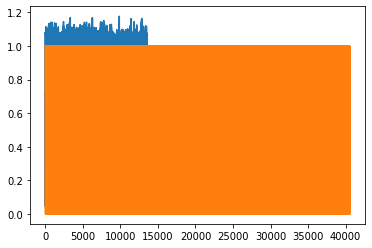

In [ ]:
reg = linear_model.Ridge (alpha = .5)
reg.fit(X_train, y_train)
print('Score: ', reg.score(X_test, y_test))
print('Weights: ', reg.coef_)

plt.plot(reg.predict(X_test))
plt.plot(y_test)
plt.show()

In [ ]:
X_train = train1.drop(['MatchResult'], axis=1)
y_train = train1['MatchResult']
X_test = test1.drop(['MatchResult'], axis=1)
y_test = test1['MatchResult']

In [ ]:
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)

# **SVM (KERNEL: GAUSSIAN)**

**Model 1 - Imbalanced towards Match**

In [ ]:
svclassifier = SVC(kernel='rbf').fit(X_train, y_train)

In [ ]:
y_pred_m1_svm_gaussian = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m1_svm_gaussian))
print(classification_report(y_test,y_pred_m1_svm_gaussian))

[[4767    0]
 [ 190 8564]]
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      4767
         1.0       1.00      0.98      0.99      8754

    accuracy                           0.99     13521
   macro avg       0.98      0.99      0.98     13521
weighted avg       0.99      0.99      0.99     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      4767             |        0               |   4767   |
|  Match (1)      |      190             |        8564              |   8754  |
|        TOTAL              |      4957             |        8564              |   13521  |

In [ ]:
m1_svm_gaussian_auc = roc_auc_score(y_test, y_pred_m1_svm_gaussian)

In [ ]:
M1_sp_SVM_gaussian=0.96
M1_se_SVM_gaussian=1.00
M1_acc_SVM_gaussian=0.99

In [ ]:
results = pd.DataFrame({'Classifier' : pd.Categorical(["SVM - Gaussian"]),
                        'Model' : pd.Categorical(["Imbalanced - Match"]),
                        'Specificity' : M1_sp_SVM_gaussian,
                        'Sensitivity' : M1_se_SVM_gaussian,
                        'Accuracy' : M1_acc_SVM_gaussian,
                        'AUC' : m1_svm_gaussian_auc})

**Model 2 - Manually Balanced**

In [ ]:
train1.MatchResult.value_counts()

1.0    17186
0.0     9857
Name: MatchResult, dtype: int64

In [ ]:
negative_cases = train1[train1['MatchResult'] == 0]
positive_cases = train1[train1['MatchResult'] == 1].sample(9857, random_state=0)
train1_balanced = pd.concat([positive_cases,negative_cases])
train1_balanced.sort_index(inplace=True)

X_train_bal = train1_balanced.drop(['MatchResult'], axis=1)
y_train_bal = train1_balanced['MatchResult']

train1_balanced.MatchResult.value_counts()

1.0    9857
0.0    9857
Name: MatchResult, dtype: int64

In [ ]:
svclassifier = SVC(kernel='rbf').fit(X_train_bal, y_train_bal)

In [ ]:
y_pred_m2_svm_gaussian = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m2_svm_gaussian))
print(classification_report(y_test,y_pred_m2_svm_gaussian))

[[4767    0]
 [ 905 7849]]
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91      4767
         1.0       1.00      0.90      0.95      8754

    accuracy                           0.93     13521
   macro avg       0.92      0.95      0.93     13521
weighted avg       0.94      0.93      0.93     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      4767             |        0               |   4767   |
|  Match (1)      |      905             |        7849              |   8754  |
|        TOTAL              |      5702             |        7849              |   13521  |

In [ ]:
m2_svm_gaussian_auc = roc_auc_score(y_test, y_pred_m2_svm_gaussian)

In [ ]:
M2_sp_SVM_gaussian=0.84
M2_se_SVM_gaussian=1.00
M2_acc_SVM_gaussian=0.93

In [ ]:
svm_gaussian_m2 = {'Model':"Balanced - Manual", 'Classifier':"SVM - Gaussian", 'Specificity':M2_sp_SVM_gaussian, 'Sensitivity':M2_se_SVM_gaussian, 'Accuracy':M2_acc_SVM_gaussian, 'AUC': m2_svm_gaussian_auc}
results = results.append(svm_gaussian_m2, ignore_index=True)

**Model 3 - SMOTE Balanced**

In [ ]:
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
svclassifier = SVC(kernel='rbf').fit(X_train_resampled, y_train_resampled)

In [ ]:
y_pred_m3_svm_gaussian = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m3_svm_gaussian))
print(classification_report(y_test,y_pred_m3_svm_gaussian))

[[4767    0]
 [ 178 8576]]
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      4767
         1.0       1.00      0.98      0.99      8754

    accuracy                           0.99     13521
   macro avg       0.98      0.99      0.99     13521
weighted avg       0.99      0.99      0.99     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      4767             |        0               |   4767   |
|  Match (1)      |      178             |        8576              |   8754  |
|        TOTAL              |      4945             |        8576              |   13521  |

In [ ]:
m3_svm_gaussian_auc = roc_auc_score(y_test, y_pred_m3_svm_gaussian)

In [ ]:
M3_sp_SVM_gaussian=0.96
M3_se_SVM_gaussian=1.00
M3_acc_SVM_gaussian=0.99

In [ ]:
svm_gaussian_m3 = {'Model':"Balanced - SMOTE", 'Classifier':"SVM - Gaussian", 'Specificity':M3_sp_SVM_gaussian, 'Sensitivity':M3_se_SVM_gaussian, 'Accuracy':M3_acc_SVM_gaussian, 'AUC': m3_svm_gaussian_auc}
results = results.append(svm_gaussian_m3, ignore_index=True)

**Model 4 - Imbalanced towards Mismatch**

In [ ]:
train1.MatchResult.value_counts()

1.0    17186
0.0     9857
Name: MatchResult, dtype: int64

In [ ]:
positive_cases = train1[train1['MatchResult'] == 1].sample(3285, random_state=0)
negative_cases = train1[train1['MatchResult'] == 0].sample(6572, random_state=0)
train1_imbalanced = pd.concat([positive_cases,negative_cases])
train1_imbalanced.sort_index(inplace=True)

X_train_imbal = train1_imbalanced.drop(['MatchResult'], axis=1)
y_train_imbal = train1_imbalanced['MatchResult']
# AFTER
train1_imbalanced.MatchResult.value_counts()

0.0    6572
1.0    3285
Name: MatchResult, dtype: int64

In [ ]:
svclassifier = SVC(kernel='rbf').fit(X_train_imbal, y_train_imbal)

In [ ]:
y_pred_m4_svm_gaussian = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m4_svm_gaussian))
print(classification_report(y_test,y_pred_m4_svm_gaussian))

[[4767    0]
 [ 904 7850]]
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91      4767
         1.0       1.00      0.90      0.95      8754

    accuracy                           0.93     13521
   macro avg       0.92      0.95      0.93     13521
weighted avg       0.94      0.93      0.93     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      4767             |        0               |   4767   |
|  Match (1)      |      904             |        7850              |   8754  |
|        TOTAL              |      5671             |        7850              |   13521  |

In [ ]:
m4_svm_gaussian_auc = roc_auc_score(y_test, y_pred_m4_svm_gaussian)

In [ ]:
M4_sp_SVM_gaussian=0.84
M4_se_SVM_gaussian=1.00
M4_acc_SVM_gaussian=0.93

In [ ]:
svm_gaussian_m4 = {'Model':"Imbalanced - Mismatch", 'Classifier':"SVM - Gaussian", 'Specificity':M4_sp_SVM_gaussian, 'Sensitivity':M4_se_SVM_gaussian, 'Accuracy':M4_acc_SVM_gaussian, 'AUC': m4_svm_gaussian_auc}
results = results.append(svm_gaussian_m4, ignore_index=True)

# **SVM (KERNEL: POLYNOMIAL)**

**Model 1 - Imbalanced towards Match**

In [ ]:
svclassifier = SVC(kernel='poly').fit(X_train, y_train)

In [ ]:
y_pred_m1_svm_polynomial = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m1_svm_polynomial))
print(classification_report(y_test,y_pred_m1_svm_polynomial))

[[4767    0]
 [ 361 8393]]
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96      4767
         1.0       1.00      0.96      0.98      8754

    accuracy                           0.97     13521
   macro avg       0.96      0.98      0.97     13521
weighted avg       0.98      0.97      0.97     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      4767             |        0               |   4767   |
|  Match (1)      |      361             |        8393              |   8754  |
|        TOTAL              |      5128             |        8393              |   13521  |

In [ ]:
m1_svm_polynomial_auc = roc_auc_score(y_test, y_pred_m1_svm_polynomial)

In [ ]:
M1_sp_SVM_polynomial=0.93
M1_se_SVM_polynomial=1.00
M1_acc_SVM_polynomial=0.97

In [ ]:
svm_polynomial_m1 = {'Model':"Imbalanced - Match", 'Classifier':"SVM - Polynomial", 'Specificity':M1_sp_SVM_polynomial, 'Sensitivity':M1_se_SVM_polynomial, 'Accuracy':M1_acc_SVM_polynomial, 'AUC': m1_svm_polynomial_auc}
results = results.append(svm_polynomial_m1, ignore_index=True)

**Model 2 - Manually Balanced**

In [ ]:
svclassifier = SVC(kernel='poly').fit(X_train_bal, y_train_bal)

In [ ]:
y_pred_m2_svm_polynomial = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m2_svm_polynomial))
print(classification_report(y_test,y_pred_m2_svm_polynomial))

[[4767    0]
 [ 421 8333]]
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      4767
         1.0       1.00      0.95      0.98      8754

    accuracy                           0.97     13521
   macro avg       0.96      0.98      0.97     13521
weighted avg       0.97      0.97      0.97     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      4767             |        0               |   4767   |
|  Match (1)      |      421             |        8333              |   8754  |
|        TOTAL              |      5188             |        8333              |   13521  |

In [ ]:
m2_svm_polynomial_auc = roc_auc_score(y_test, y_pred_m2_svm_polynomial)

In [ ]:
M2_sp_SVM_polynomial=0.92
M2_se_SVM_polynomial=1.00
M2_acc_SVM_polynomial=0.97

In [ ]:
svm_polynomial_m2 = {'Model':"Balanced - Manual", 'Classifier':"SVM - Polynomial", 'Specificity':M2_sp_SVM_polynomial, 'Sensitivity':M2_se_SVM_polynomial, 'Accuracy':M2_acc_SVM_polynomial, 'AUC': m2_svm_polynomial_auc}
results = results.append(svm_polynomial_m2, ignore_index=True)

**Model 3 - SMOTE Balanced**

In [ ]:
svclassifier = SVC(kernel='poly').fit(X_train_resampled, y_train_resampled)

In [ ]:
y_pred_m3_svm_polynomial = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m3_svm_polynomial))
print(classification_report(y_test,y_pred_m3_svm_polynomial))

[[4767    0]
 [ 356 8398]]
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96      4767
         1.0       1.00      0.96      0.98      8754

    accuracy                           0.97     13521
   macro avg       0.97      0.98      0.97     13521
weighted avg       0.98      0.97      0.97     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      4767             |        0               |   4767   |
|  Match (1)      |      356             |        8398              |   8754  |
|        TOTAL              |      5123             |        8398              |   13521  |

In [ ]:
m3_svm_polynomial_auc = roc_auc_score(y_test, y_pred_m3_svm_polynomial)

In [ ]:
M3_sp_SVM_polynomial=0.93
M3_se_SVM_polynomial=1.00
M3_acc_SVM_polynomial=0.97

In [ ]:
svm_polynomial_m3 = {'Model':"Balanced - SMOTE", 'Classifier':"SVM - Polynomial", 'Specificity':M3_sp_SVM_polynomial, 'Sensitivity':M3_se_SVM_polynomial, 'Accuracy':M3_acc_SVM_polynomial, 'AUC': m3_svm_polynomial_auc}
results = results.append(svm_polynomial_m3, ignore_index=True)

**Model 4 - Imbalanced towards Mismatch**

In [ ]:
svclassifier = SVC(kernel='poly').fit(X_train_imbal, y_train_imbal)

In [ ]:
y_pred_m4_svm_polynomial = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m4_svm_polynomial))
print(classification_report(y_test,y_pred_m4_svm_polynomial))

[[4767    0]
 [ 613 8141]]
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      4767
         1.0       1.00      0.93      0.96      8754

    accuracy                           0.95     13521
   macro avg       0.94      0.96      0.95     13521
weighted avg       0.96      0.95      0.96     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      4767             |        0               |   4767   |
|  Match (1)      |      613             |        8141              |   8754  |
|        TOTAL              |      5380             |        8141              |   13521  |

In [ ]:
m4_svm_polynomial_auc = roc_auc_score(y_test, y_pred_m4_svm_polynomial)

In [ ]:
M4_sp_SVM_polynomial=0.89
M4_se_SVM_polynomial=1.00
M4_acc_SVM_polynomial=0.95

In [ ]:
svm_polynomial_m4 = {'Model':"Imbalanced - Mismatch", 'Classifier':"SVM - Polynomial", 'Specificity':M4_sp_SVM_polynomial, 'Sensitivity':M4_se_SVM_polynomial, 'Accuracy':M4_acc_SVM_polynomial, 'AUC': m4_svm_polynomial_auc}
results = results.append(svm_polynomial_m4, ignore_index=True)

# **SVM (KERNEL: SIGMOID)**

**Model 1 - Imbalanced towards Match**

In [ ]:
svclassifier = SVC(kernel='sigmoid').fit(X_train, y_train)

In [ ]:
y_pred_m1_svm_sigmoid = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m1_svm_sigmoid))
print(classification_report(y_test,y_pred_m1_svm_sigmoid))

[[1875 2892]
 [3078 5676]]
              precision    recall  f1-score   support

         0.0       0.38      0.39      0.39      4767
         1.0       0.66      0.65      0.66      8754

    accuracy                           0.56     13521
   macro avg       0.52      0.52      0.52     13521
weighted avg       0.56      0.56      0.56     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      1875             |        2892               |   4767   |
|  Match (1)      |      3078             |        5676              |   8754  |
|        TOTAL              |      4953             |        8568              |   13521  |

In [ ]:
m1_svm_sigmoid_auc = roc_auc_score(y_test, y_pred_m1_svm_sigmoid)

In [ ]:
M1_sp_SVM_sigmoid=0.38
M1_se_SVM_sigmoid=0.39
M1_acc_SVM_sigmoid=0.56

In [ ]:
svm_sigmoid_m1 = {'Model':"Imbalanced - Match", 'Classifier':"SVM - Sigmoid", 'Specificity':M1_sp_SVM_sigmoid, 'Sensitivity':M1_se_SVM_sigmoid, 'Accuracy':M1_acc_SVM_sigmoid, 'AUC': m1_svm_sigmoid_auc}
results = results.append(svm_sigmoid_m1, ignore_index=True)

**Model 2 - Manually Balanced**

In [ ]:
svclassifier = SVC(kernel='sigmoid').fit(X_train_bal, y_train_bal)

In [ ]:
y_pred_m2_svm_sigmoid = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m2_svm_sigmoid))
print(classification_report(y_test,y_pred_m2_svm_sigmoid))

[[2324 2443]
 [4416 4338]]
              precision    recall  f1-score   support

         0.0       0.34      0.49      0.40      4767
         1.0       0.64      0.50      0.56      8754

    accuracy                           0.49     13521
   macro avg       0.49      0.49      0.48     13521
weighted avg       0.54      0.49      0.50     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      2324             |        2443               |   4767   |
|  Match (1)      |      4416             |        4338              |   8754  |
|        TOTAL              |      6740             |        6781              |   13521  |

In [ ]:
m2_svm_sigmoid_auc = roc_auc_score(y_test, y_pred_m2_svm_sigmoid)

In [ ]:
M2_sp_SVM_sigmoid=0.34
M2_se_SVM_sigmoid=0.49
M2_acc_SVM_sigmoid=0.49

In [ ]:
svm_sigmoid_m2 = {'Model':"Balanced - Manual", 'Classifier':"SVM - Sigmoid", 'Specificity':M2_sp_SVM_sigmoid, 'Sensitivity':M2_se_SVM_sigmoid, 'Accuracy':M2_acc_SVM_sigmoid, 'AUC': m2_svm_sigmoid_auc}
results = results.append(svm_sigmoid_m2, ignore_index=True)

**Model 3 - SMOTE Balanced**

In [ ]:
svclassifier = SVC(kernel='sigmoid').fit(X_train_resampled, y_train_resampled)

In [ ]:
y_pred_m3_svm_sigmoid = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m3_svm_sigmoid))
print(classification_report(y_test,y_pred_m3_svm_sigmoid))

[[2329 2438]
 [4451 4303]]
              precision    recall  f1-score   support

         0.0       0.34      0.49      0.40      4767
         1.0       0.64      0.49      0.56      8754

    accuracy                           0.49     13521
   macro avg       0.49      0.49      0.48     13521
weighted avg       0.53      0.49      0.50     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      2329             |        2438               |   4767   |
|  Match (1)      |     4451             |        4303              |   8754  |
|        TOTAL              |      6780             |        6741              |   13521  |

In [ ]:
m3_svm_sigmoid_auc = roc_auc_score(y_test, y_pred_m3_svm_sigmoid)

In [ ]:
M3_sp_SVM_sigmoid=0.34
M3_se_SVM_sigmoid=0.49
M3_acc_SVM_sigmoid=0.49

In [ ]:
svm_sigmoid_m3 = {'Model':"Balanced - SMOTE", 'Classifier':"SVM - Sigmoid", 'Specificity':M3_sp_SVM_sigmoid, 'Sensitivity':M3_se_SVM_sigmoid, 'Accuracy':M3_acc_SVM_sigmoid, 'AUC': m3_svm_sigmoid_auc}
results = results.append(svm_sigmoid_m3, ignore_index=True)

**Model 4 - Imbalanced towards Mismatch**

In [ ]:
svclassifier = SVC(kernel='sigmoid').fit(X_train_imbal, y_train_imbal)

In [ ]:
y_pred_m4_svm_sigmoid = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m4_svm_sigmoid))
print(classification_report(y_test,y_pred_m4_svm_sigmoid))

[[3116 1651]
 [5842 2912]]
              precision    recall  f1-score   support

         0.0       0.35      0.65      0.45      4767
         1.0       0.64      0.33      0.44      8754

    accuracy                           0.45     13521
   macro avg       0.49      0.49      0.45     13521
weighted avg       0.54      0.45      0.44     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      3116             |        1651               |   4767   |
|  Match (1)      |      5842             |        2912              |   8754  |
|        TOTAL              |      8958             |        4563              |   13521  |

In [ ]:
m4_svm_sigmoid_auc = roc_auc_score(y_test, y_pred_m4_svm_sigmoid)

In [ ]:
M4_sp_SVM_sigmoid=0.35
M4_se_SVM_sigmoid=0.65
M4_acc_SVM_sigmoid=0.45

In [ ]:
svm_sigmoid_m4 = {'Model':"Imbalanced - Mismatch", 'Classifier':"SVM - Sigmoid", 'Specificity':M4_sp_SVM_sigmoid, 'Sensitivity':M4_se_SVM_sigmoid, 'Accuracy':M4_acc_SVM_sigmoid, 'AUC': m4_svm_sigmoid_auc}
results = results.append(svm_sigmoid_m4, ignore_index=True)

# **NAIVE BAYES (GAUSSIAN)**

**Model 1 - Imbalanced towards Match**

In [ ]:
gnb = GaussianNB().fit(X_train, y_train)

In [ ]:
y_pred_m1_naive_gaussian = gnb.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m1_naive_gaussian))
print(classification_report(y_test,y_pred_m1_naive_gaussian))

[[4767    0]
 [   0 8754]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4767
         1.0       1.00      1.00      1.00      8754

    accuracy                           1.00     13521
   macro avg       1.00      1.00      1.00     13521
weighted avg       1.00      1.00      1.00     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      4767             |        0               |   4767   |
|  Match (1)      |      0             |        8754              |   8754  |
|        TOTAL              |      4767             |        8754              |   13521  |

In [ ]:
m1_naive_gaussian_auc = roc_auc_score(y_test, y_pred_m1_naive_gaussian)

In [ ]:
M1_sp_naive_gaussian=1.00
M1_se_naive_gaussian=1.00
M1_acc_naive_gaussian=1.00

In [ ]:
naive_gaussian_m1 = {'Model':"Imbalanced - Match", 'Classifier':"Naive Bayes - Gaussian", 'Specificity':M1_sp_naive_gaussian, 'Sensitivity':M1_se_naive_gaussian, 'Accuracy':M1_acc_naive_gaussian, 'AUC': m1_naive_gaussian_auc}
results = results.append(naive_gaussian_m1, ignore_index=True)

**Model 2 - Manually Balanced**

In [ ]:
gnb = GaussianNB().fit(X_train_bal, y_train_bal)

In [ ]:
y_pred_m2_naive_gaussian = gnb.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m2_naive_gaussian))
print(classification_report(y_test,y_pred_m2_naive_gaussian))

[[4767    0]
 [   0 8754]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4767
         1.0       1.00      1.00      1.00      8754

    accuracy                           1.00     13521
   macro avg       1.00      1.00      1.00     13521
weighted avg       1.00      1.00      1.00     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      4767             |        0               |   4767   |
|  Match (1)      |      0             |        8754              |   8754  |
|        TOTAL              |      4767             |        8754              |   13521  |

In [ ]:
m2_naive_gaussian_auc = roc_auc_score(y_test, y_pred_m2_naive_gaussian)

In [ ]:
M2_sp_naive_gaussian=1.00
M2_se_naive_gaussian=1.00
M2_acc_naive_gaussian=1.00

In [ ]:
naive_gaussian_m2 = {'Model':"Balanced - Manual", 'Classifier':"Naive Bayes - Gaussian", 'Specificity':M2_sp_naive_gaussian, 'Sensitivity':M2_se_naive_gaussian, 'Accuracy':M2_acc_naive_gaussian, 'AUC': m2_naive_gaussian_auc}
results = results.append(naive_gaussian_m2, ignore_index=True)

**Model 3 - SMOTE Balanced**

In [ ]:
gnb = GaussianNB().fit(X_train_resampled, y_train_resampled)

In [ ]:
y_pred_m3_naive_gaussian = gnb.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m3_naive_gaussian))
print(classification_report(y_test,y_pred_m3_naive_gaussian))

[[4767    0]
 [   0 8754]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4767
         1.0       1.00      1.00      1.00      8754

    accuracy                           1.00     13521
   macro avg       1.00      1.00      1.00     13521
weighted avg       1.00      1.00      1.00     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      4767             |        0               |   4767   |
|  Match (1)      |      0             |        8754              |   8754  |
|        TOTAL              |      4767             |        8754              |   13521  |

In [ ]:
m3_naive_gaussian_auc = roc_auc_score(y_test, y_pred_m3_naive_gaussian)

In [ ]:
M3_sp_naive_gaussian=1.00
M3_se_naive_gaussian=1.00
M3_acc_naive_gaussian=1.00

In [ ]:
naive_gaussian_m3 = {'Model':"Balanced - SMOTE", 'Classifier':"Naive Bayes - Gaussian", 'Specificity':M3_sp_naive_gaussian, 'Sensitivity':M3_se_naive_gaussian, 'Accuracy':M3_acc_naive_gaussian, 'AUC': m3_naive_gaussian_auc}
results = results.append(naive_gaussian_m3, ignore_index=True)

**Model 4 - Imbalanced towards Mismatch**

In [ ]:
gnb = GaussianNB().fit(X_train_imbal, y_train_imbal)

In [ ]:
y_pred_m4_naive_gaussian = gnb.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m4_naive_gaussian))
print(classification_report(y_test,y_pred_m4_naive_gaussian))

[[4767    0]
 [   0 8754]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4767
         1.0       1.00      1.00      1.00      8754

    accuracy                           1.00     13521
   macro avg       1.00      1.00      1.00     13521
weighted avg       1.00      1.00      1.00     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      4767             |        0               |   4767   |
|  Match (1)      |      0             |        8754              |   8754  |
|        TOTAL              |      4767             |        8754              |   13521  |

In [ ]:
m4_naive_gaussian_auc = roc_auc_score(y_test, y_pred_m4_naive_gaussian)

In [ ]:
M4_sp_naive_gaussian=1.00
M4_se_naive_gaussian=1.00
M4_acc_naive_gaussian=1.00

In [ ]:
naive_gaussian_m4 = {'Model':"Imbalanced - Mismatch", 'Classifier':"Naive Bayes - Gaussian", 'Specificity':M4_sp_naive_gaussian, 'Sensitivity':M4_se_naive_gaussian, 'Accuracy':M4_acc_naive_gaussian, 'AUC': m4_naive_gaussian_auc}
results = results.append(naive_gaussian_m4, ignore_index=True)

# **Naive Bayes (Bernoulli)**

**Model 1 - Imbalanced towards Match**

In [ ]:
gnb = BernoulliNB().fit(X_train, y_train)

In [ ]:
y_pred_m1_naive_bernoulli = gnb.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m1_naive_bernoulli))
print(classification_report(y_test,y_pred_m1_naive_bernoulli))

[[1605 3162]
 [1592 7162]]
              precision    recall  f1-score   support

         0.0       0.50      0.34      0.40      4767
         1.0       0.69      0.82      0.75      8754

    accuracy                           0.65     13521
   macro avg       0.60      0.58      0.58     13521
weighted avg       0.63      0.65      0.63     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      1605             |        3162               |   4767   |
|  Match (1)      |      1592             |        7162              |   8754  |
|        TOTAL              |      3197             |        10324              |   13521  |

In [ ]:
m1_naive_bernoulli_auc = roc_auc_score(y_test, y_pred_m1_naive_bernoulli)

In [ ]:
M1_sp_naive_bernoulli=0.50
M1_se_naive_bernoulli=0.34
M1_acc_naive_bernoulli=0.65

In [ ]:
naive_bernoullii_m1 = {'Model':"Imbalanced - Match", 'Classifier':"Naive Bayes - Bernoulli", 'Specificity':M1_sp_naive_bernoulli, 'Sensitivity':M1_se_naive_bernoulli, 'Accuracy':M1_acc_naive_bernoulli, 'AUC':m1_naive_bernoulli_auc}
results = results.append(naive_bernoullii_m1, ignore_index=True)

**Model 2 - Manually Balanced**

In [ ]:
gnb = BernoulliNB().fit(X_train_bal, y_train_bal)

In [ ]:
y_pred_m2_naive_bernoulli = gnb.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m2_naive_bernoulli))
print(classification_report(y_test,y_pred_m2_naive_bernoulli))

[[1605 3162]
 [1592 7162]]
              precision    recall  f1-score   support

         0.0       0.50      0.34      0.40      4767
         1.0       0.69      0.82      0.75      8754

    accuracy                           0.65     13521
   macro avg       0.60      0.58      0.58     13521
weighted avg       0.63      0.65      0.63     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      1605             |        3162               |   4767   |
|  Match (1)      |      1592             |        7162              |   8754  |
|        TOTAL              |      3197             |        10324              |   13521  |

In [ ]:
m2_naive_bernoulli_auc = roc_auc_score(y_test, y_pred_m2_naive_bernoulli)

In [ ]:
M2_sp_naive_bernoulli=0.50
M2_se_naive_bernoulli=0.34
M2_acc_naive_bernoulli=0.65

In [ ]:
naive_bernoullii_m2 = {'Model':"Balanced - Manual", 'Classifier':"Naive Bayes - Bernoulli", 'Specificity':M2_sp_naive_bernoulli, 'Sensitivity':M2_se_naive_bernoulli, 'Accuracy':M2_acc_naive_bernoulli, 'AUC':m2_naive_bernoulli_auc}
results = results.append(naive_bernoullii_m2, ignore_index=True)

**Model 3 - SMOTE Balanced**

In [ ]:
gnb = BernoulliNB().fit(X_train_resampled, y_train_resampled)

In [ ]:
y_pred_m3_naive_bernoulli = gnb.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m3_naive_bernoulli))
print(classification_report(y_test,y_pred_m3_naive_bernoulli))

[[1605 3162]
 [1592 7162]]
              precision    recall  f1-score   support

         0.0       0.50      0.34      0.40      4767
         1.0       0.69      0.82      0.75      8754

    accuracy                           0.65     13521
   macro avg       0.60      0.58      0.58     13521
weighted avg       0.63      0.65      0.63     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      1605             |        3162               |   4767   |
|  Match (1)      |      1592             |        7162              |   8754  |
|        TOTAL              |      3197             |        10324              |   13521  |

In [ ]:
m3_naive_bernoulli_auc = roc_auc_score(y_test, y_pred_m3_naive_bernoulli)

In [ ]:
M3_sp_naive_bernoulli=0.50
M3_se_naive_bernoulli=0.34
M3_acc_naive_bernoulli=0.65

In [ ]:
naive_bernoullii_m3 = {'Model':"Balanced - SMOTE", 'Classifier':"Naive Bayes - Bernoulli", 'Specificity':M3_sp_naive_bernoulli, 'Sensitivity':M3_se_naive_bernoulli, 'Accuracy':M3_acc_naive_bernoulli, 'AUC':m3_naive_bernoulli_auc}
results = results.append(naive_bernoullii_m3, ignore_index=True)

**Model 4 - Imbalanced towards Mismatch**

In [ ]:
gnb = BernoulliNB().fit(X_train_imbal, y_train_imbal)

In [ ]:
y_pred_m4_naive_bernoulli = gnb.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m4_naive_bernoulli))
print(classification_report(y_test,y_pred_m4_naive_bernoulli))

[[4767    0]
 [8692   62]]
              precision    recall  f1-score   support

         0.0       0.35      1.00      0.52      4767
         1.0       1.00      0.01      0.01      8754

    accuracy                           0.36     13521
   macro avg       0.68      0.50      0.27     13521
weighted avg       0.77      0.36      0.19     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      4767             |        0               |   4767   |
|  Match (1)      |      8692             |        62              |   8754  |
|        TOTAL              |      13459             |        62              |   13521  |

In [ ]:
m4_naive_bernoulli_auc = roc_auc_score(y_test, y_pred_m4_naive_bernoulli)

In [ ]:
M4_sp_naive_bernoulli=0.35
M4_se_naive_bernoulli=1.00
M4_acc_naive_bernoulli=0.36

In [ ]:
naive_bernoullii_m4 = {'Model':"Imbalanced - Mismatch", 'Classifier':"Naive Bayes - Bernoulli", 'Specificity':M4_sp_naive_bernoulli, 'Sensitivity':M4_se_naive_bernoulli, 'Accuracy':M4_acc_naive_bernoulli, 'AUC':m4_naive_bernoulli_auc}
results = results.append(naive_bernoullii_m4, ignore_index=True)

# **Random Forest**



**Model 1 - Imbalanced towards Match**

In [ ]:
rf = RandomForestClassifier().fit(X_train, y_train)

In [ ]:
y_pred_m1_rf = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred_m1_rf))
print(classification_report(y_test,y_pred_m1_rf))

[[4767    0]
 [   0 8754]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4767
         1.0       1.00      1.00      1.00      8754

    accuracy                           1.00     13521
   macro avg       1.00      1.00      1.00     13521
weighted avg       1.00      1.00      1.00     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      4767             |        0               |   4767   |
|  Match (1)      |      0             |        8754              |   8754  |
|        TOTAL              |      4767             |        8754              |   13521  |

In [ ]:
m1_rf_auc = roc_auc_score(y_test, y_pred_m1_rf)

In [ ]:
M1_sp_rf=1.00
M1_se_rf=1.00
M1_acc_rf=1.00

In [ ]:
rf_m1 = {'Model':"Imbalanced - Match", 'Classifier':"Random Forest", 'Specificity':M1_sp_rf, 'Sensitivity':M1_se_rf, 'Accuracy':M1_acc_rf, 'AUC':m1_rf_auc}
results = results.append(rf_m1, ignore_index=True)

**Model 2 - Manually Balanced**

In [ ]:
rf = RandomForestClassifier().fit(X_train_bal, y_train_bal)

In [ ]:
y_pred_m2_rf = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred_m2_rf))
print(classification_report(y_test,y_pred_m2_rf))

[[4767    0]
 [   0 8754]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4767
         1.0       1.00      1.00      1.00      8754

    accuracy                           1.00     13521
   macro avg       1.00      1.00      1.00     13521
weighted avg       1.00      1.00      1.00     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      4767             |        0               |   4767   |
|  Match (1)      |      0             |        8754              |   8754  |
|        TOTAL              |      4767             |        8754              |   13521  |

In [ ]:
m2_rf_auc = roc_auc_score(y_test, y_pred_m2_rf)

In [ ]:
M2_sp_rf=1.00
M2_se_rf=1.00
M2_acc_rf=1.00

In [ ]:
rf_m2 = {'Model':"Balanced - Manual", 'Classifier':"Random Forest", 'Specificity':M2_sp_rf, 'Sensitivity':M2_se_rf, 'Accuracy':M2_acc_rf, 'AUC':m2_rf_auc}
results = results.append(rf_m2, ignore_index=True)

**Model 3 - SMOTE Balanced**

In [ ]:
rf = RandomForestClassifier().fit(X_train_resampled, y_train_resampled)

In [ ]:
y_pred_m3_rf = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred_m3_rf))
print(classification_report(y_test,y_pred_m3_rf))

[[4767    0]
 [   0 8754]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4767
         1.0       1.00      1.00      1.00      8754

    accuracy                           1.00     13521
   macro avg       1.00      1.00      1.00     13521
weighted avg       1.00      1.00      1.00     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      4767             |        0               |   4767   |
|  Match (1)      |      0             |        8754              |   8754  |
|        TOTAL              |      4767             |        8754              |   13521  |

In [ ]:
m3_rf_auc = roc_auc_score(y_test, y_pred_m3_rf)

In [ ]:
M3_sp_rf=1.00
M3_se_rf=1.00
M3_acc_rf=1.00

In [ ]:
rf_m3 = {'Model':"Balanced - SMOTE", 'Classifier':"Random Forest", 'Specificity':M3_sp_rf, 'Sensitivity':M3_se_rf, 'Accuracy':M3_acc_rf, 'AUC':m3_rf_auc}
results = results.append(rf_m3, ignore_index=True)

**Model 4 - Imbalanced towards Mismatch**

In [ ]:
rf = RandomForestClassifier().fit(X_train_imbal, y_train_imbal)

In [ ]:
y_pred_m4_rf = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred_m4_rf))
print(classification_report(y_test,y_pred_m4_rf))

[[4767    0]
 [   0 8754]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4767
         1.0       1.00      1.00      1.00      8754

    accuracy                           1.00     13521
   macro avg       1.00      1.00      1.00     13521
weighted avg       1.00      1.00      1.00     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      4767             |        0               |   4767   |
|  Match (1)      |      0             |        8754              |   8754  |
|        TOTAL              |      4767             |        8754              |   13521  |

In [ ]:
m4_rf_auc = roc_auc_score(y_test, y_pred_m4_rf)

In [ ]:
M4_sp_rf=1.00
M4_se_rf=1.00
M4_acc_rf=1.00

In [ ]:
rf_m4 = {'Model':"Imbalanced - Mismatch", 'Classifier':"Random Forest", 'Specificity':M4_sp_rf, 'Sensitivity':M4_se_rf, 'Accuracy':M4_acc_rf, 'AUC':m4_rf_auc}
results = results.append(rf_m4, ignore_index=True)

# **LightGBM**

**Model 1 - Imbalanced towards Match**

In [ ]:
model = lgb.LGBMClassifier().fit(X_train, y_train)

In [ ]:
y_pred_m1_lgb = model.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m1_lgb))
print(classification_report(y_test,y_pred_m1_lgb))

[[4767    0]
 [   0 8754]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4767
         1.0       1.00      1.00      1.00      8754

    accuracy                           1.00     13521
   macro avg       1.00      1.00      1.00     13521
weighted avg       1.00      1.00      1.00     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      4767             |        0               |   4767   |
|  Match (1)      |      0             |        8754              |   8754  |
|        TOTAL              |      4767             |        8754              |   13521  |

In [ ]:
m1_lgb_auc = roc_auc_score(y_test, y_pred_m1_lgb)

In [ ]:
M1_sp_lgb=1.00
M1_se_lgb=1.00
M1_acc_lgb=1.00

In [ ]:
lgb_m1 = {'Model':"Imbalanced - Match", 'Classifier':"Light GBM", 'Specificity':M1_sp_lgb, 'Sensitivity':M1_se_lgb, 'Accuracy':M1_acc_lgb, 'AUC':m1_lgb_auc}
results = results.append(lgb_m1, ignore_index=True)

**Model 2 - Manually Balanced**

In [ ]:
model = lgb.LGBMClassifier().fit(X_train_bal, y_train_bal)

In [ ]:
y_pred_m2_lgb = model.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m2_lgb))
print(classification_report(y_test,y_pred_m2_lgb))

[[4767    0]
 [   0 8754]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4767
         1.0       1.00      1.00      1.00      8754

    accuracy                           1.00     13521
   macro avg       1.00      1.00      1.00     13521
weighted avg       1.00      1.00      1.00     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      4767             |        0               |   4767   |
|  Match (1)      |      0             |        8754              |   8754  |
|        TOTAL              |      4767             |        8754              |   13521  |

In [ ]:
m2_lgb_auc = roc_auc_score(y_test, y_pred_m2_lgb)

In [ ]:
M2_sp_lgb=1.00
M2_se_lgb=1.00
M2_acc_lgb=1.00

In [ ]:
lgb_m2 = {'Model':"Balanced - Manual", 'Classifier':"Light GBM", 'Specificity':M2_sp_lgb, 'Sensitivity':M2_se_lgb, 'Accuracy':M2_acc_lgb, 'AUC':m2_lgb_auc}
results = results.append(lgb_m2, ignore_index=True)

**Model 3 - SMOTE Balanced**

In [ ]:
model = lgb.LGBMClassifier().fit(X_train_resampled, y_train_resampled)

In [ ]:
y_pred_m3_lgb = model.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m3_lgb))
print(classification_report(y_test,y_pred_m3_lgb))

[[4767    0]
 [   0 8754]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4767
         1.0       1.00      1.00      1.00      8754

    accuracy                           1.00     13521
   macro avg       1.00      1.00      1.00     13521
weighted avg       1.00      1.00      1.00     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      4767             |        0               |   4767   |
|  Match (1)      |      0             |        8754              |   8754  |
|        TOTAL              |      4767             |        8754              |   13521  |

In [ ]:
m3_lgb_auc = roc_auc_score(y_test, y_pred_m3_lgb)

In [ ]:
M3_sp_lgb=1.00
M3_se_lgb=1.00
M3_acc_lgb=1.00

In [ ]:
lgb_m3 = {'Model':"Balanced - SMOTE", 'Classifier':"Light GBM", 'Specificity':M3_sp_lgb, 'Sensitivity':M3_se_lgb, 'Accuracy':M3_acc_lgb, 'AUC':m3_lgb_auc}
results = results.append(lgb_m3, ignore_index=True)

**Model 4 - Imbalanced towards Mismatch**

In [ ]:
model = lgb.LGBMClassifier().fit(X_train_imbal, y_train_imbal)

In [ ]:
y_pred_m4_lgb = model.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m4_lgb))
print(classification_report(y_test,y_pred_m4_lgb))

[[4767    0]
 [   1 8753]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4767
         1.0       1.00      1.00      1.00      8754

    accuracy                           1.00     13521
   macro avg       1.00      1.00      1.00     13521
weighted avg       1.00      1.00      1.00     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      4767             |        0               |   4767   |
|  Match (1)      |      1             |        8753              |   8754  |
|        TOTAL              |      4768             |        8753              |   13521  |

In [ ]:
m4_lgb_auc = roc_auc_score(y_test, y_pred_m4_lgb)

In [ ]:
M4_sp_lgb=1.00
M4_se_lgb=1.00
M4_acc_lgb=1.00

In [ ]:
lgb_m4 = {'Model':"Imbalanced - Mismatch", 'Classifier':"Light GBM", 'Specificity':M4_sp_lgb, 'Sensitivity':M4_se_lgb, 'Accuracy':M4_acc_lgb, 'AUC': m4_lgb_auc}
results = results.append(lgb_m4, ignore_index=True)

In [ ]:
#results.drop(results.tail(1).index,inplace=True)

In [ ]:
results.sort_values('AUC', ascending=False)

,Classifier,Model,Specificity,Sensitivity,Accuracy,AUC
14,Naive Bayes - Gaussian,Balanced - SMOTE,1.00,1.00,1.00,1.000000
12,Naive Bayes - Gaussian,Imbalanced - Match,1.00,1.00,1.00,1.000000
26,Light GBM,Balanced - SMOTE,1.00,1.00,1.00,1.000000
25,Light GBM,Balanced - Manual,1.00,1.00,1.00,1.000000
24,Light GBM,Imbalanced - Match,1.00,1.00,1.00,1.000000
23,Random Forest,Imbalanced - Mismatch,1.00,1.00,1.00,1.000000
22,Random Forest,Balanced - SMOTE,1.00,1.00,1.00,1.000000
21,Random Forest,Balanced - Manual,1.00,1.00,1.00,1.000000
20,Random Forest,Imbalanced - Match,1.00,1.00,1.00,1.000000
15,Naive Bayes - Gaussian,Imbalanced - Mismatch,1.00,1.00,1.00,1.000000


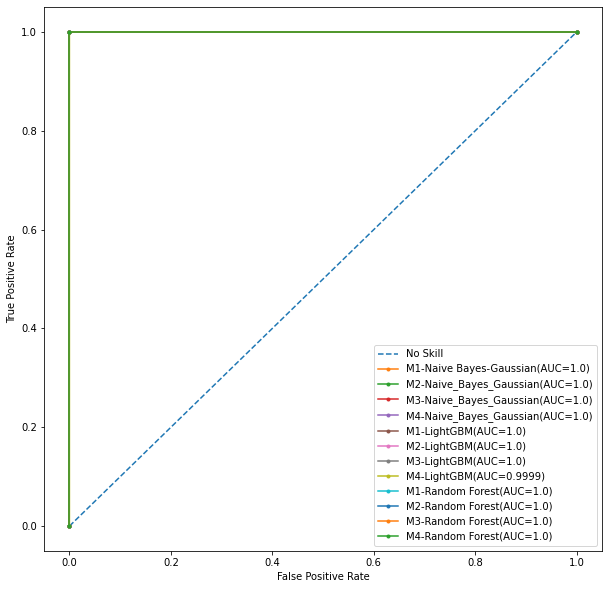

In [ ]:
# Top AUC scores

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
m1_naive_gaussian_fpr, m1_naive_gaussian_tpr, _ = roc_curve(y_test, y_pred_m1_naive_gaussian)
m2_naive_gaussian_fpr, m2_naive_gaussian_tpr, _ = roc_curve(y_test, y_pred_m2_naive_gaussian)
m3_naive_gaussian_fpr, m3_naive_gaussian_tpr, _ = roc_curve(y_test, y_pred_m3_naive_gaussian)
m4_naive_gaussian_fpr, m4_naive_gaussian_tpr, _ = roc_curve(y_test, y_pred_m4_naive_gaussian)


m3_lgb_fpr, m3_lgb_tpr, _ = roc_curve(y_test, y_pred_m3_lgb)
m2_lgb_fpr, m2_lgb_tpr, _ = roc_curve(y_test, y_pred_m2_lgb)
m1_lgb_fpr, m1_lgb_tpr, _ = roc_curve(y_test, y_pred_m1_lgb)
m4_lgb_fpr, m4_lgb_tpr, _ = roc_curve(y_test, y_pred_m4_lgb)

m1_rf_fpr, m1_rf_tpr, _ = roc_curve(y_test, y_pred_m1_rf)
m2_rf_fpr, m2_rf_tpr, _ = roc_curve(y_test, y_pred_m2_rf)
m3_rf_fpr, m3_rf_tpr, _ = roc_curve(y_test, y_pred_m3_rf)
m4_rf_fpr, m4_rf_tpr, _ = roc_curve(y_test, y_pred_m4_rf)



# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(m1_naive_gaussian_fpr, m1_naive_gaussian_tpr, marker='.', label='M1-Naive Bayes-Gaussian(AUC=1.0)')
pyplot.plot(m2_naive_gaussian_fpr, m2_naive_gaussian_tpr, marker='.', label='M2-Naive_Bayes_Gaussian(AUC=1.0)')
pyplot.plot(m3_naive_gaussian_fpr, m3_naive_gaussian_tpr, marker='.', label='M3-Naive_Bayes_Gaussian(AUC=1.0)')
pyplot.plot(m4_naive_gaussian_fpr, m4_naive_gaussian_tpr, marker='.', label='M4-Naive_Bayes_Gaussian(AUC=1.0)')

pyplot.plot(m1_lgb_fpr, m1_lgb_tpr, marker='.', label='M1-LightGBM(AUC=1.0)')
pyplot.plot(m2_lgb_fpr, m2_lgb_tpr, marker='.', label='M2-LightGBM(AUC=1.0)')
pyplot.plot(m3_lgb_fpr, m3_lgb_tpr, marker='.', label='M3-LightGBM(AUC=1.0)')
pyplot.plot(m4_lgb_fpr, m4_lgb_tpr, marker='.', label='M4-LightGBM(AUC=0.9999)')

pyplot.plot(m1_rf_fpr, m1_rf_tpr, marker='.', label='M1-Random Forest(AUC=1.0)')
pyplot.plot(m2_rf_fpr, m2_rf_tpr, marker='.', label='M2-Random Forest(AUC=1.0)')
pyplot.plot(m3_rf_fpr, m3_rf_tpr, marker='.', label='M3-Random Forest(AUC=1.0)')
pyplot.plot(m4_rf_fpr, m4_rf_tpr, marker='.', label='M4-Random Forest(AUC=1.0)')


# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.rcParams['figure.figsize'] = 10,10
pyplot.show()


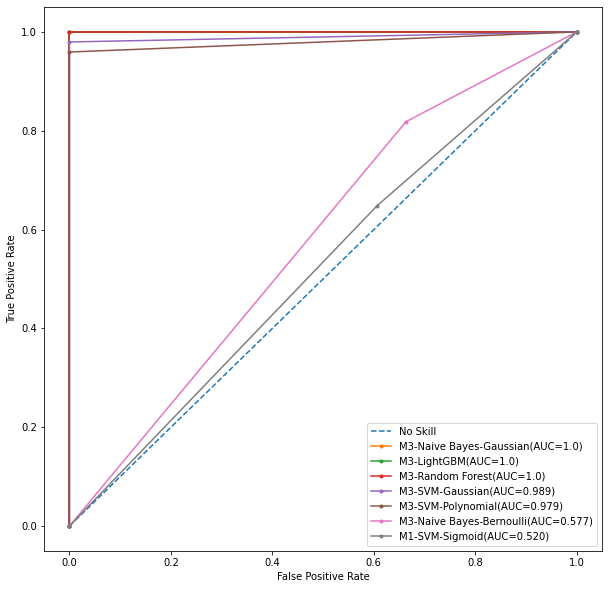

In [ ]:
# Top 5 Classifiers

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
m3_naive_gaussian_fpr, m3_naive_gaussian_tpr, _ = roc_curve(y_test, y_pred_m3_naive_gaussian)
m3_lgb_fpr, m3_lgb_tpr, _ = roc_curve(y_test, y_pred_m3_lgb)
m3_rf_fpr, m3_rf_tpr, _ = roc_curve(y_test, y_pred_m3_rf)
m3_svm_gaussian_fpr, m3_svm_gaussian_tpr, _ = roc_curve(y_test, y_pred_m3_svm_gaussian)
m3_svm_polynomial_fpr, m3_svm_polynomial_tpr, _ = roc_curve(y_test, y_pred_m3_svm_polynomial)
m3_naive_bernoulli_fpr, m3_naive_bernoulli_tpr, _ = roc_curve(y_test, y_pred_m3_naive_bernoulli)
m1_svm_sigmoid_fpr, m1_svm_sigmoid_tpr, _ = roc_curve(y_test, y_pred_m1_svm_sigmoid)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(m3_naive_gaussian_fpr, m3_naive_gaussian_tpr, marker='.', label='M3-Naive Bayes-Gaussian(AUC=1.0)')
pyplot.plot(m3_lgb_fpr, m3_lgb_tpr, marker='.', label='M3-LightGBM(AUC=1.0)')
pyplot.plot(m3_rf_fpr, m3_rf_tpr, marker='.', label='M3-Random Forest(AUC=1.0)')
pyplot.plot(m3_svm_gaussian_fpr, m3_svm_gaussian_tpr, marker='.', label='M3-SVM-Gaussian(AUC=0.989)')
pyplot.plot(m3_svm_polynomial_fpr, m3_svm_polynomial_tpr, marker='.', label='M3-SVM-Polynomial(AUC=0.979)')
pyplot.plot(m3_naive_bernoulli_fpr, m3_naive_bernoulli_tpr, marker='.', label='M3-Naive Bayes-Bernoulli(AUC=0.577)')
pyplot.plot(m1_svm_sigmoid_fpr, m1_svm_sigmoid_tpr, marker='.', label='M1-SVM-Sigmoid(AUC=0.520)')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.rcParams['figure.figsize'] = 10,10

pyplot.show()

In [ ]:
outfile = 'result1_off.csv'
results.to_csv(outfile)